In [1]:
import csv
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from copy import deepcopy
from scipy.spatial.distance import cdist

In [2]:
#reading data into data
data = pd.read_csv('changeddata.csv')
print("Input data and shape")
print(type(data))
data.head()
data.shape

Input data and shape
<class 'pandas.core.frame.DataFrame'>


(576574, 8)

In [3]:
#taking only a week's inputs - 09/02/18-15/02/18
date = [20180209, 20180210, 20180211, 20180212, 20180213, 20180214, 20180215]
week = data[data.Date.isin(date)]
week.shape

(46252, 8)

In [14]:
#2 features on which clustering should happen
f1 = week['Date'].values
f2 = week['Time'].values
print(type(f2))
print(f2)

<class 'numpy.ndarray'>
[20 20 20 ... 23 23 23]


In [5]:
#Binning the dates
for i in range(len(f1)):
    if(f1[i]==20180209):
        f1[i]=1
    elif(f1[i]==20180210):
        f1[i]=2
    elif(f1[i]==20180211):
        f1[i]=3
    elif(f1[i]==20180212):
        f1[i]=4
    elif(f1[i]==20180213):
        f1[i]=5
    elif(f1[i]==20180214):
        f1[i]=6
    elif(f1[i]==20180215):
        f1[i]=7
    

In [6]:
max(f2)

23

In [7]:
#zipping the features
X = np.array(list(zip(f1, f2)))
print(X)

[[ 1 20]
 [ 1 20]
 [ 1 20]
 ...
 [ 7 23]
 [ 7 23]
 [ 7 23]]


In [8]:
# import KMeans
from sklearn.cluster import KMeans

In [9]:
# create kmeans object
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X)

[[ 3.85253682  3.21963993]
 [ 2.58611514 10.65989357]
 [ 4.23305412 19.44548969]]


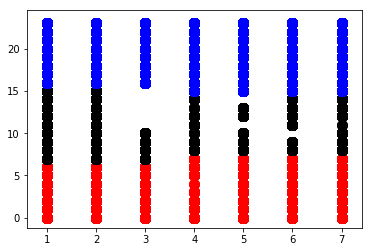

In [10]:
plt.scatter(X[y_km ==0,0], X[y_km == 0,1], s=100, c='red')
plt.scatter(X[y_km ==1,0], X[y_km == 1,1], s=100, c='black')
plt.scatter(X[y_km ==2,0], X[y_km == 2,1], s=100, c='blue')

In [11]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

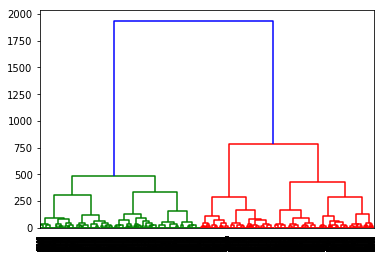

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)

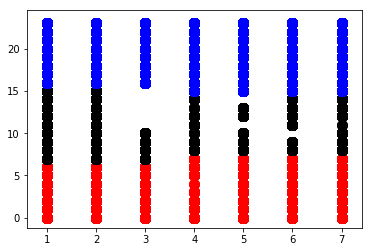

In [13]:
plt.scatter(X[y_km ==0,0], X[y_km == 0,1], s=100, c='red')
plt.scatter(X[y_km ==1,0], X[y_km == 1,1], s=100, c='black')
plt.scatter(X[y_km ==2,0], X[y_km == 2,1], s=100, c='blue')

In [ ]:
#Number of clusters = 3
k = 3 

#Random centroids
C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(10, 8))

tick_spacingx = 1
tick_spacingy = 4
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 7)
plt.scatter(C_x, C_y, marker='*', s = 100, c='g')
plt.ylim([-1, 24])
plt.xlim([0, 8])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Date vs Time for LUIDs")

In [ ]:
#Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a - b)

In [ ]:
#To store the value of centroids when it updates
C_old = np.zeros(C.shape)

#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old)
print(error)

In [ ]:
#Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    print(C_old)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old)
    print(error)

In [ ]:
#Plotting after clustering
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots(figsize=(10, 8))
plt.ylim([-1, 24])
plt.xlim([0, 8])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Clustering")

tick_spacingx = 4
tick_spacingy = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=20, c='#050505')



In [ ]:
#Final centroid cluster
print(C)